In [1]:
import rasterio as rio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from rasterio.plot import show
from PIL import Image

#### 1. Load the orthomosaic and mask into numpy arrays and display them

Shape of the orthomosaic:  (3, 5016, 3411)
Shape of the corresponding mask:  (1, 5016, 3411)


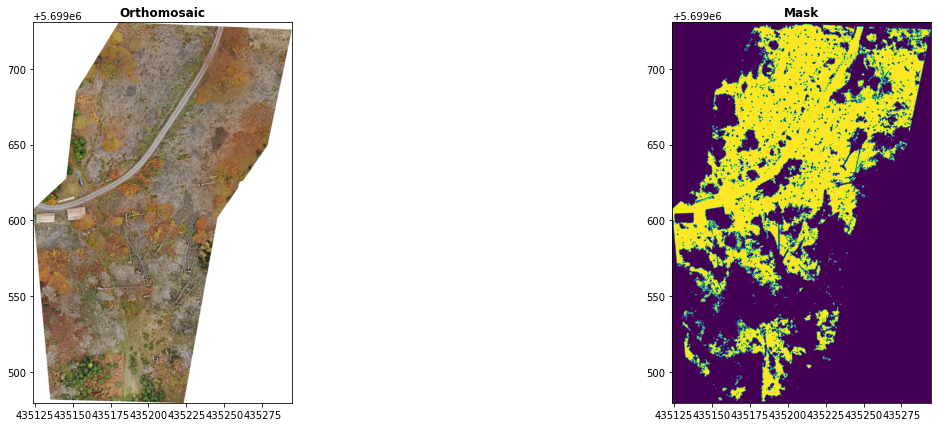

In [2]:
# Read the orthomosaic
ortho = rio.open('../Images/Orthomosaics/ortho-50mm.tif')
ortho_array = ortho.read()

# Read the CHM
mask = rio.open('../Images/Height_cropping/Medium_resolution/medium_0.05.tif')
mask_array = mask.read()

# Printing the shapes of the objects (to be sure they have the same dimensionality)
print('Shape of the orthomosaic: ', ortho_array.shape)
print('Shape of the corresponding mask: ', mask_array.shape)

# Plotting the orthomosaic and the CHM to be sure they represent the same scene
fig, (fig1, fig2) = plt.subplots(1,2, figsize=(21,7))
show(ortho, ax=fig1, title='Orthomosaic')
show(mask, ax=fig2, title='Mask')
plt.show()

#### 2. Crop and display a window from the orthomosaic and the CHM

Shape of the ortho test window:  (3, 512, 512)
Shape of the mask test window:  (1, 512, 512)


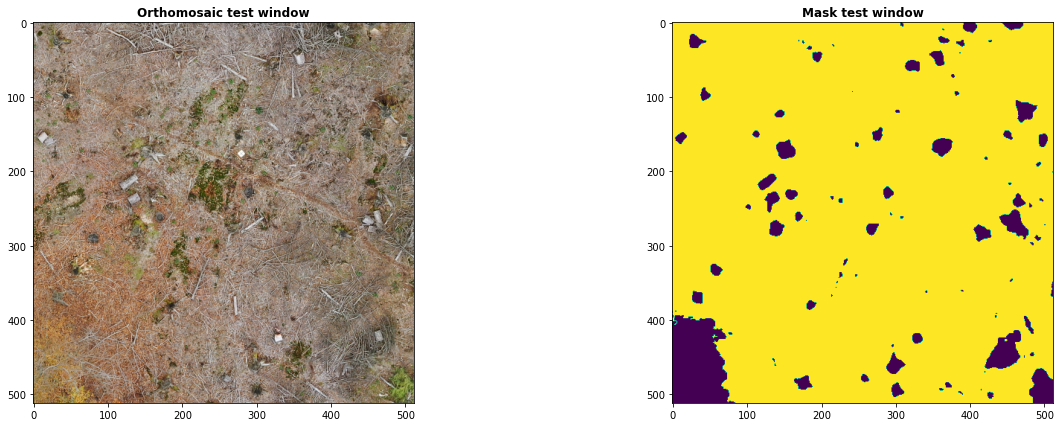

In [3]:
test_window_ortho = ortho_array[0:3, 1023:1535, 1023:1535]
test_window_mask = mask_array[0:3, 1023:1535, 1023:1535]

print('Shape of the ortho test window: ', test_window_ortho.shape)
print('Shape of the mask test window: ', test_window_mask.shape)

fig, (fig1, fig2) = plt.subplots(1,2, figsize=(21,7))
show(test_window_ortho, ax=fig1, title='Orthomosaic test window')
show(test_window_mask, ax=fig2, title='Mask test window')
plt.show()

#### 3. Defining a function which is sliding over the model, cropping windows from it and save the generated images

In [4]:
import matplotlib.cm as cm

def sliding_window(array, window, stride):

    for row in range(0, array.shape[1]-window, stride):
        for col in range(0, array.shape[2]-window, stride):
            if array.shape[0] == 3:
                # Crop the image
                # RGB, Height, Width
                img = array[0:3, row:row+window, col:col+window]

                # Reshape the numpy array to be able to save as an image
                # Height, Width, RGB
                img = np.moveaxis(img, 0, -1)
                
                # Save the image
                # Naming convention: row_col.png
                file = Image.fromarray(img, 'RGB')
                file.save('../Images/Sliding_window/rgb/' + str(int(row/window)) + '_' + str(int(col/window)) + '.png')

            elif array.shape[0] == 1:
                # Crop the image
                img = array[0:1, row:row+window, col:col+window]

                # (1, 512, 512) -> (512, 512, 1)
                img = np.moveaxis(img, 0, -1)

                # float32 -> uint8
                img = img.astype('uint8')

                # Invert 0 and 255 values: 
                # - white -> soil
                # - black -> not soil
                img = np.where(img == 0, 255, 0)

                # (512, 512, 1) -> (512, 512)
                img = np.squeeze(img, axis=2)
                
                plt.imsave('../Images/Sliding_window/mask/' + str(int(row/window)) + '_' + str(int(col/window)) + '.png', img, cmap=cm.gray)

            

#### 4. Call the function
Parameters:
- The orthomosaic as a numpy array
- Size of the window (in pixels)
- Stride (distance between two windows in pixels)

In [5]:
sliding_window(ortho_array, 256, 256)
sliding_window(mask_array, 256, 256)

#### 5. Visualizing a cropped image and a corresponding mask image

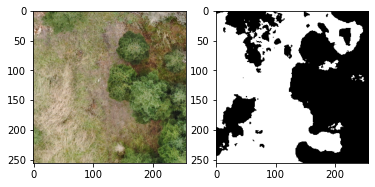

In [8]:
img_rgb = plt.imread('../Images/Sliding_window/rgb/18_5.png')
img_mask= plt.imread('../Images/Sliding_window/mask/18_5.png')

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_rgb)
axarr[1].imshow(img_mask)